This notebook is a brief introduction to Anscombe's Quartet, a group of 4 datasets that show how simple descriptive statistics can be deceptive! I have named Anscombe's four datasets 'noisy', 'poly', 'outlier', and 'hmm'... Each dataset has eleven data points. Run this cell to get the summary statistics of these four famous datasets, including their means, correlations, lines of best fit, and more!

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

x_noisy = np.array([10.0, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_noisy = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x_poly = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_poly = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x_outlier = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]).reshape(-1, 1)
y_outlier = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x_hmm = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y_hmm = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

lreg = LinearRegression()
lreg1 = LinearRegression()
lreg2 = LinearRegression()
lreg3 = LinearRegression()

lreg.fit(x_noisy, y_noisy)
lreg1.fit(x_poly, y_poly)
lreg2.fit(x_outlier, y_outlier)
lreg3.fit(x_hmm, y_hmm)

print('Mean of x values \nnoisy:', x_noisy.mean(), '\npoly:', x_poly.mean(), 
      '\noutlier:', x_outlier.mean(), '\nhmm:', x_outlier.mean(), '\n')

print('Variance of x values \nnoisy:', np.var(x_noisy),'\npoly:', np.var(x_poly),
      '\noutlier:', np.var(x_outlier), '\nhmm:', np.var(x_hmm), '\n')

print('Mean of y values \nnoisy:', "%.2f" % y_noisy.mean(), '\npoly: ', "%.2f" % y_poly.mean(), 
      '\noutlier: ', "%.2f" % y_outlier.mean(), '\nhmm: ', "%.2f" % y_outlier.mean(), '\n')

print('Variance of y values \nnoisy:', "%.2f" % np.var(y_noisy),'\npoly:', "%.2f" % np.var(y_poly),
      '\noutlier:', "%.2f" % np.var(y_outlier), '\nhmm:', "%.2f" % np.var(y_hmm), '\n')

print('Correlation \nnoisy:', "%.2f" % np.corrcoef(x_noisy.reshape(1,11), y_noisy.reshape(1,11))[1][0],'\npoly:', "%.2f" % np.corrcoef(x_poly.reshape(1,11), y_poly.reshape(1,11))[1][0],
      '\noutlier:', "%.2f" % np.corrcoef(x_outlier.reshape(1,11), y_outlier.reshape(1,11))[1][0], '\nhmm:', "%.2f" % np.corrcoef(x_hmm.reshape(1,11), y_hmm.reshape(1,11))[1][0], '\n')

print('Linear Regression Trendline \nnoisy: ', "%.2f" % lreg.coef_, 'x + ', "%.2f" % lreg.intercept_,
      '\npoly: ', "%.2f" % lreg1.coef_, 'x + ', "%.2f" % lreg1.intercept_,
      '\noutlier: ', "%.2f" % lreg2.coef_, 'x + ', "%.2f" % lreg2.intercept_,
      '\nhmm: ', "%.2f" % lreg3.coef_, 'x + ', "%.2f" % lreg3.intercept_, '\n',
      sep = '')

print('R^2 value (Coefficient of Determination) \nnoisy:', "%.2f" % r2_score(y_noisy, lreg.predict(x_noisy)),
      '\npoly:', "%.2f" % r2_score(y_poly, lreg1.predict(x_poly)),
      '\noutlier:', "%.2f" % r2_score(y_outlier, lreg2.predict(x_outlier)),
      '\nhmm:', "%.2f" % r2_score(y_hmm, lreg.predict(x_hmm)),)

Mean of x values 
noisy: 9.0 
poly: 9.0 
outlier: 9.0 
hmm: 9.0 

Variance of x values 
noisy: 10.0 
poly: 10.0 
outlier: 10.0 
hmm: 10.0 

Mean of y values 
noisy: 7.50 
poly:  7.50 
outlier:  7.50 
hmm:  7.50 

Variance of y values 
noisy: 3.75 
poly: 3.75 
outlier: 3.75 
hmm: 3.75 

Correlation 
noisy: 0.82 
poly: 0.82 
outlier: 0.82 
hmm: 0.82 

Linear Regression Trendline 
noisy: 0.50x + 3.00
poly: 0.50x + 3.00
outlier: 0.50x + 3.00
hmm: 0.50x + 3.00

R^2 value (Coefficient of Determination) 
noisy: 0.67 
poly: 0.67 
outlier: 0.67 
hmm: 0.67


As we can see, the four datasets have almost identical summary statistics. That must mean they are very similar... right? Before running the next cell, take a second to envision what the datasets that generated these statistics might look like. Eleven datapoints, all with a trendline of 0.5x + 3, correlation of 0.82, R^2 of 0.67... etc. Try to graph the datasets in your mind, then run the next cell

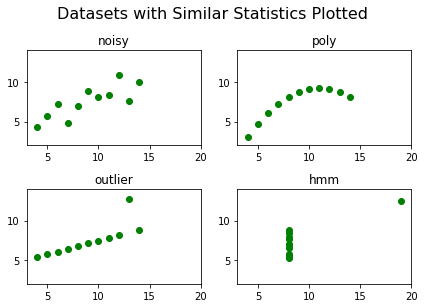

In [48]:
fig = plt.figure()
fig.suptitle('Datasets with Similar Statistics Plotted', fontsize=16, y = 1.06)

plt.subplot(221)
plt.axis((3, 20, 2, 14))
plt.scatter(x_noisy, y_noisy, color = 'g')
plt.title('noisy')


plt.subplot(222)
plt.axis((3, 20, 2, 14))
plt.scatter(x_poly, y_poly, color = 'g')
plt.title('poly')

plt.subplot(223)
plt.axis((3, 20, 2, 14))
plt.scatter(x_outlier, y_outlier, color = 'g')
plt.title('outlier')

plt.subplot(224)
plt.axis((3, 20, 2, 14))
plt.scatter(x_hmm, y_hmm, color = 'g')
plt.title('hmm')

plt.tight_layout()
plt.show()

Wow! Those graphs don't look similar at all! Which of the datasets above do you think demonstrate a linear relationship between x and y? Why do you think this? After all, all four datasets have the exact same R^2 value, indicating the same amount of variance in y that can be explained by a linear function of x. Anscombe's quartet goes to show that even basic summary statistics can be misleading, and sometimes visualation conveys information that summary statistics might miss. Run the cell below to see the graphs above with their trendlines added

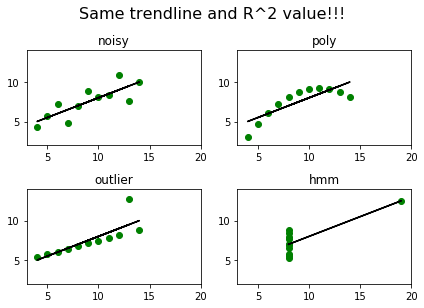

In [43]:
fig = plt.figure()
fig.suptitle('Same trendline and R^2!!!', fontsize=16, y = 1.06)

plt.subplot(221)
plt.axis((3, 20, 2, 14))
plt.plot(x_noisy, lreg.predict(x_noisy), color = 'k')
plt.scatter(x_noisy, y_noisy, color = 'g')
plt.title('noisy')


plt.subplot(222)
plt.axis((3, 20, 2, 14))
plt.plot(x_poly, lreg1.predict(x_poly), color = 'k')
plt.scatter(x_poly, y_poly, color = 'g')
plt.title('poly')

plt.subplot(223)
plt.axis((3, 20, 2, 14))
plt.plot(x_outlier, lreg2.predict(x_outlier), color = 'k')
plt.scatter(x_outlier, y_outlier, color = 'g')
plt.title('outlier')

plt.subplot(224)
plt.axis((3, 20, 2, 14))
plt.plot(x_hmm, lreg3.predict(x_hmm), color = 'k')
plt.scatter(x_hmm, y_hmm, color = 'g')
plt.title('hmm')

plt.tight_layout()
plt.show()